In [1]:
print("hello world")

hello world


In [ ]:
# necessary imports
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages, Messages
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, BaseMessage
from typing import Annotated, Literal, List
from pydantic import BaseModel, Field
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver

In [3]:
load_dotenv()

True

In [84]:
# define the graph state 
class ChatState(BaseModel):
    messages: Annotated[List[BaseMessage], add_messages()]
    

In [74]:
# Define the chat model
llm = ChatGoogleGenerativeAI(model = "gemini-2.5-flash", temperature=0.7)

In [85]:
# Define the chatting Function
def chat(state: ChatState):

    messages = state.messages

    response = llm.invoke(messages)
    
    return {"messages": [response]}

In [86]:
# Define checkpoint to save chat history
checkpoint = MemorySaver()
# Define Graph
graph = StateGraph(ChatState)

# Adding nodes to the graph
graph.add_node("chat", chat)

# Adding the edges to the graph
graph.add_edge(START, "chat")
graph.add_edge("chat", END)

# Compiling the graph
chatbot = graph.compile(checkpointer=checkpoint)

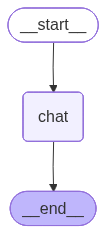

In [87]:
chatbot

In [88]:
# Define thread id
thread_id = "chat_thread_1"
# making it a chat loop
while True:
    user_input = input("User: ")
    print("User:", user_input)
    if user_input.strip().lower() in ["exit" , "quit", "bye"]:
        print("Exiting chat. Goodbye!")
        break
    
    configuration = {"configurable": {"thread_id": thread_id}}

    # Initial state
    initial_state = ChatState(messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content=user_input)
    ])
    response = chatbot.invoke(initial_state, config=configuration)
    ai_message = response["messages"][-1]
    print("AI:", ai_message.content)

User: HI, my name is Rakib
AI: Hi Rakib! It's nice to meet you. How can I help you today?
User: Car you write my name uppercase
AI: RAKIB
User: add Md. before my name
AI: MD. RAKIB
User: add Sheikh after my name
AI: MD. RAKIB SHEIKH
User: bye
Exiting chat. Goodbye!


In [89]:
chatbot.get_state(config=configuration)

StateSnapshot(values={'messages': [SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={}, id='3a4b9299-f0c8-482b-8646-c9ce66d9609e'), HumanMessage(content='HI, my name is Rakib', additional_kwargs={}, response_metadata={}, id='9fce33d1-0b3a-48aa-8075-08a077b17438'), AIMessage(content="Hi Rakib! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--19b0b140-27c0-49eb-9e4d-be9941bcfc21-0', usage_metadata={'input_tokens': 14, 'output_tokens': 37, 'total_tokens': 51, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 18}}), SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={}, id='5ba8395c-8e61-4567-8405-888a0564dd54'), HumanMessage(content='Car you write my name uppercase', additional_kw